In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
sys.path.append('../')
tf.random.set_seed(42)

from helpers import *
from glash_v2 import glash_discriminator, glash_generator, Glash

2021-12-20 02:10:53.576969: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
mean = (1, 1)
cov = [[1, 0], [0, 1]] # Should be symmetric
x = np.random.multivariate_normal(mean, cov, 1000).astype('float32')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.02701664, -1.97128391, -1.91555118, -1.85981844, -1.80408571,
        -1.74835298, -1.69262025, -1.63688752, -1.58115479, -1.52542205,
        -1.46968932, -1.41395659, -1.35822386, -1.30249113, -1.24675839,
        -1.19102566, -1.13529293, -1.0795602 , -1.02382747, -0.96809474,
        -0.912362  , -0.85662927, -0.80089654, -0.74516381, -0.68943108,
        -0.63369834, -0.57796561, -0.52223288, -0.46650015, -0.41076742,
        -0.35503469, -0.29930195, -0.24356922, -0.18783649, -0.13210376,
        -0.07637103, -0.02063829,  0.03509444,  0.09082717,  0.1465599 ,
         0.20229263,  0.25802536,  0.3137581 ,  0.36949083,  0.42522356,
         0.48095629,  0.53668902,  0.59242176,  0.64815449,  0.70388722,
         0.75961995, 

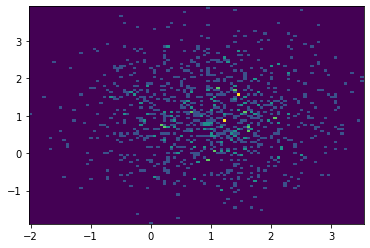

In [3]:
plt.hist2d(x[:, :1].reshape(1000,), x[:, 1:2].reshape(1000,), bins=100)

In [4]:
train_data = tf.data.Dataset.from_tensor_slices(x)
train_data = train_data.batch(64).prefetch(32)

2021-12-20 02:10:55.061125: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-20 02:10:55.062028: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-20 02:10:55.122332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 02:10:55.122966: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-12-20 02:10:55.122995: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-20 02:10:55.124407: I tensorflow/stream_executor/platform/defa

In [5]:
glash = Glash(glash_discriminator(), glash_generator())
glash.compile(
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adam(),
    tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [6]:
generated_point_list = []

cbk = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: show_samples(generated_point_list, epoch, glash.generator, x))

history = glash.fit(train_data, epochs=5000, callbacks=[cbk], verbose=False)

2021-12-20 02:10:56.410219: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-20 02:10:56.436163: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2021-12-20 02:10:56.541772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


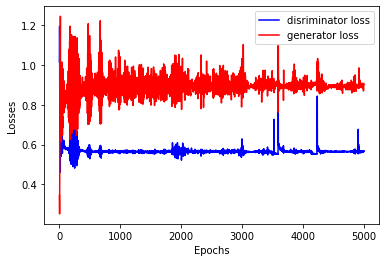

In [7]:
plt.plot(history.history['d_loss'], color='blue', label='disriminator loss')
plt.plot(history.history['g_loss'], color='red', label='generator loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

In [8]:
noise = toy_data(1000, 0, 1).astype('float32')
noise.shape

(1000, 2)

In [9]:
np.random.uniform(0,1,(1000,5))

array([[0.60622157, 0.11421469, 0.94804511, 0.62059515, 0.3258435 ],
       [0.38346833, 0.72170837, 0.72934857, 0.13929412, 0.44079807],
       [0.15924471, 0.80646265, 0.50176984, 0.32632987, 0.34119563],
       ...,
       [0.84350303, 0.35437462, 0.94115995, 0.31049884, 0.22558759],
       [0.68985906, 0.81841708, 0.1118652 , 0.8422504 , 0.26400699],
       [0.04983252, 0.97989193, 0.95208462, 0.91225833, 0.38993861]])

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  3.,  2.,
          2.,  1.,  3.,  5.,  4.,  9.,  1.,  1.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  4.,
          1.,  1.,  1.,  1.,  1.,  2.,  0.,  4.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  5.,
          2.,  4.,  3.,  2.,  5.,  2.,  2.,  2.,  0.,  2.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  4.,  4.,
          2.,  5.,  4.,  2.,  3.,  3.,  4.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  1.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  2.,  4.,
          2.,  3.,  2.,  3.,  2.,  2.,  2.,  0.,  0.,  2.,  0.,  1.],
        [ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  4.,  0.,  4.,  2.,  1.,
          3., 10.,  5.,  6.,  5.,  2.,  3.,  2.,  2.,  2.,  0.,  0.],
        [ 0.,  0.,  4.,  2.,  1.,  0.,  1.,  2.,  3.,  3.,  1.,  5.,  7.,
          3.,  7.,  1.,  3.,  5.,  2.,  4.,  1.,  3.,  3.,  1.

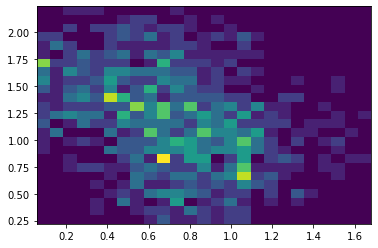

In [10]:
test = glash(np.random.uniform(0,1,(1000,5)))
x_test = tf.reshape(test[:, :1], (1000,))
y_test = tf.reshape(test[:, 1:2], (1000,))

plt.hist2d(x_test, y_test, bins=25)

(array([35., 16., 20., 28., 35., 24., 45., 48., 51., 54., 65., 79., 59.,
        69., 54., 54., 43., 47., 63., 39., 16., 17., 10.,  8.,  3.,  2.,
         9.,  4.,  1.,  2.]),
 array([0.05698626, 0.11111362, 0.16524097, 0.21936834, 0.2734957 ,
        0.32762304, 0.3817504 , 0.43587777, 0.49000514, 0.5441325 ,
        0.59825987, 0.6523872 , 0.70651454, 0.76064193, 0.81476927,
        0.8688966 , 0.923024  , 0.97715133, 1.0312787 , 1.0854061 ,
        1.1395334 , 1.1936607 , 1.2477882 , 1.3019155 , 1.3560429 ,
        1.4101702 , 1.4642975 , 1.5184249 , 1.5725523 , 1.6266797 ,
        1.680807  ], dtype=float32),
 <BarContainer object of 30 artists>)

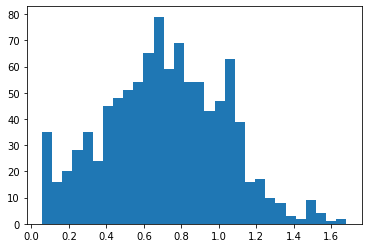

In [11]:
a = x_test.numpy()
plt.hist(a, bins=30)

(array([11., 14., 20., 27., 21., 27., 42., 25., 46., 54., 42., 56., 50.,
        57., 56., 61., 52., 50., 36., 45., 37., 34., 30., 32., 17., 19.,
        17., 15.,  4.,  3.]),
 array([0.22027588, 0.28757766, 0.3548794 , 0.4221812 , 0.48948294,
        0.5567847 , 0.6240865 , 0.69138825, 0.75869   , 0.82599175,
        0.89329356, 0.9605953 , 1.0278971 , 1.0951989 , 1.1625006 ,
        1.2298024 , 1.2971041 , 1.3644059 , 1.4317076 , 1.4990095 ,
        1.5663112 , 1.633613  , 1.7009147 , 1.7682165 , 1.8355182 ,
        1.90282   , 1.9701217 , 2.0374236 , 2.1047254 , 2.172027  ,
        2.2393289 ], dtype=float32),
 <BarContainer object of 30 artists>)

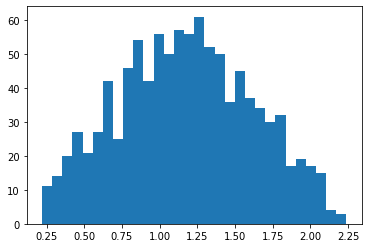

In [12]:
b = y_test.numpy()
plt.hist(b, bins=30)

In [13]:
stats_gen_x = stats_dist(a, prnt=False)
stats_gen_y = stats_dist(b, prnt=False)

stats_or_x = stats_dist(x[:, :1].reshape(1000,), prnt=False)
stats_or_y = stats_dist(x[:, 1:2].reshape(1000,), prnt=False)

In [14]:
stats_df = df_generator(stats_or_x,
                        stats_gen_x,
                        stats_or_y,
                        stats_gen_y,
                        np.array(["Mean:", "Standard Deviation:",
                                  " Variance:", "Covariance:"]),
                        df_style)

stats_df

,,original_x_dim,generated_x_dim,original_y_dim,generated_y_dim
0,Mean:,0.995628,0.710409,1.003480,1.174681
1,Standard Deviation:,0.996837,0.318013,1.014810,0.443066
2,Variance:,0.993684,0.101132,1.029840,0.196307
3,Covariance:,0.994679,0.101233,1.030871,0.196504
